In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
df=pd.read_csv('placement_2.csv')

In [22]:
df.shape

(1000, 3)

In [23]:
df.sample(5)

,cgpa,placement_exam_marks,placed
91,7.42,6.0,1
619,6.81,43.0,0
280,6.62,55.0,0
908,6.06,17.0,1
886,7.22,17.0,1


C:\Users\91750\AppData\Local\Temp\ipykernel_29684\518990362.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\91750\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91750\AppData\Local\Temp\ipykernel_29684\518990362.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

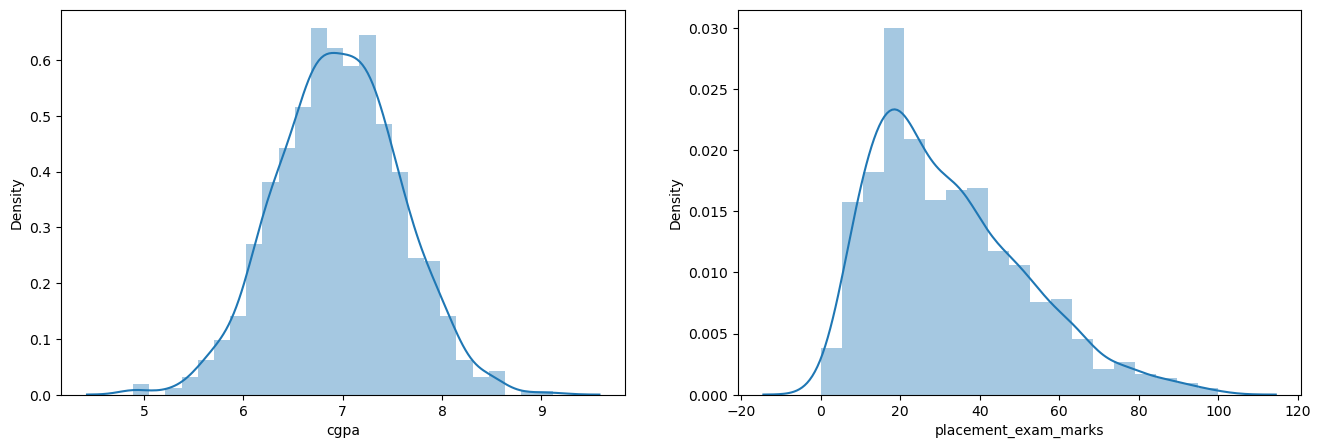

In [25]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [26]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [29]:
print('Mean value of CGPA',df['cgpa'].mean())
print('std value of cgpa',df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())

Mean value of CGPA 6.96124
std value of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [30]:
#findind the boundary values 


In [32]:
print('highest allowed',df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest allowed',df['cgpa'].mean()-3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [38]:
#finding the outliers 
df[(df['cgpa']>8.80) | (df['cgpa'] <5.11)]
#df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


TRIMMING


In [41]:
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [42]:
#approach 2 
# calculating the z score

In [43]:
df['z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()


In [44]:
df.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [45]:
new_df=df[(df['z_score']<3) & (df['z_score']>-3)]

In [46]:
new_df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


CAPPING

In [48]:
lower_limit=df['cgpa'].mean()+3*df['cgpa'].std()
upper_limit=df['cgpa'].mean()-3*df['cgpa'].std()


In [49]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [50]:
df['cgpa'].describe()

count    1000.000000
mean        5.124633
std         0.202202
min         5.113546
25%         5.113546
50%         5.113546
75%         5.113546
max         8.808934
Name: cgpa, dtype: float64

IQR METHOD

In [53]:
df ['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

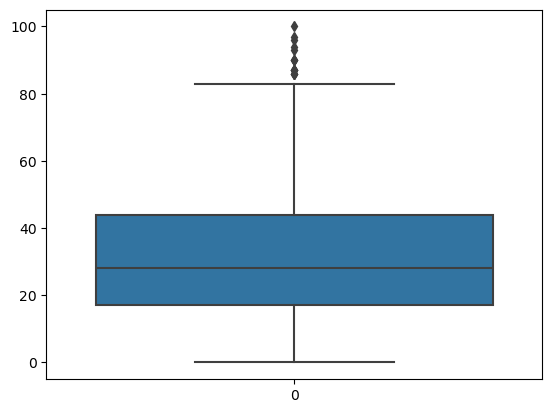

In [55]:
sns.boxplot(df['placement_exam_marks'])

In [56]:
percentage25=df['placement_exam_marks'].quantile(0.25)
percentage75=df['placement_exam_marks'].quantile(0.75)

In [57]:
iqr=percentage75-percentage25

In [58]:
upper_limit=percentage75+1.5*iqr
lower_limit=percentage25-1.5*iqr

In [61]:
new_df=df[(df['placement_exam_marks']<upper_limit) & (df['placement_exam_marks']>lower_limit)]

In [62]:
new_df

,cgpa,placement_exam_marks,placed,z_score
0,5.113546,26.0,1,0.371425
1,5.113546,38.0,1,0.809810
2,5.113546,40.0,1,0.939701
3,5.113546,8.0,1,-0.878782
4,5.113546,17.0,0,0.436371
...,...,...,...,...
995,5.113546,44.0,1,3.099150
996,5.113546,65.0,1,3.505062
997,8.808934,34.0,0,-3.362960
998,5.113546,46.0,1,2.693239


CAPPING 

In [63]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

C:\Users\91750\AppData\Local\Temp\ipykernel_29684\2127205041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\91750\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91750\AppData\Local\Temp\ipykernel_29684\2127205041.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simil

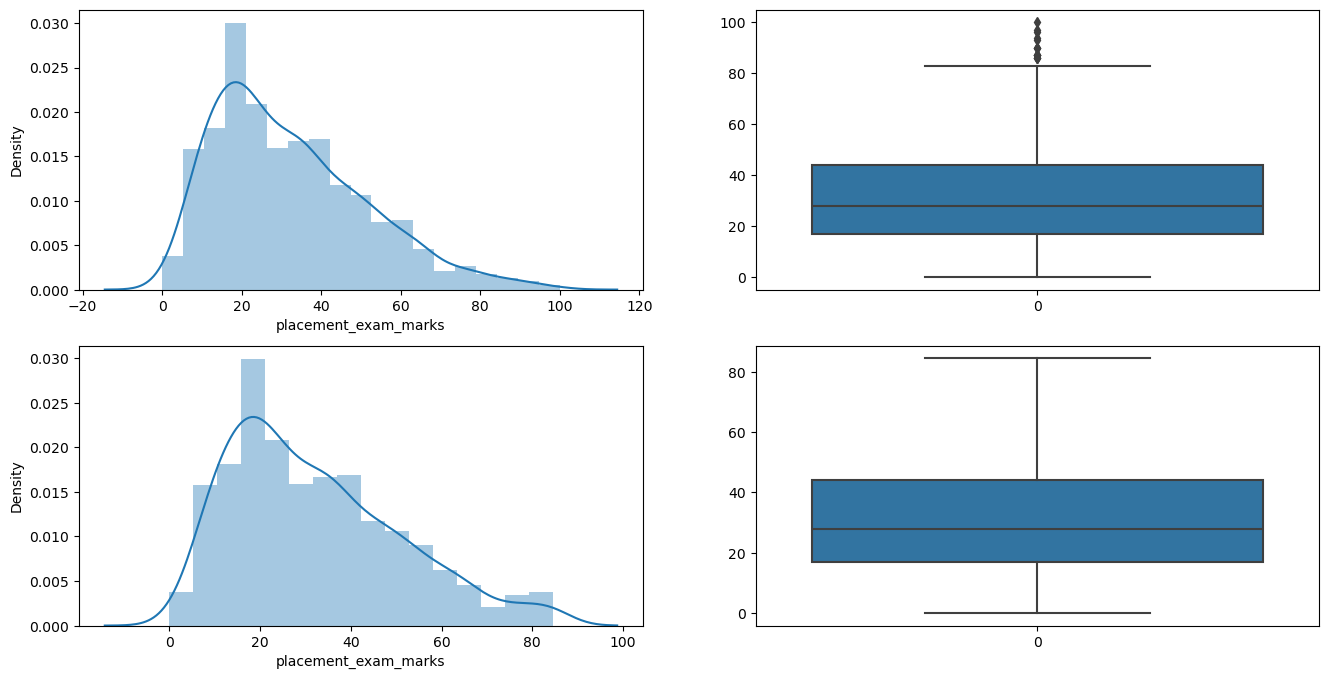

In [66]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

PERCENTILE METHOD


In [68]:
df = pd.read_csv('weight-height.csv')

In [69]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [71]:
df.shape

(10000, 3)

In [73]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [74]:
import seaborn as sns

C:\Users\91750\AppData\Local\Temp\ipykernel_29684\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\91750\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

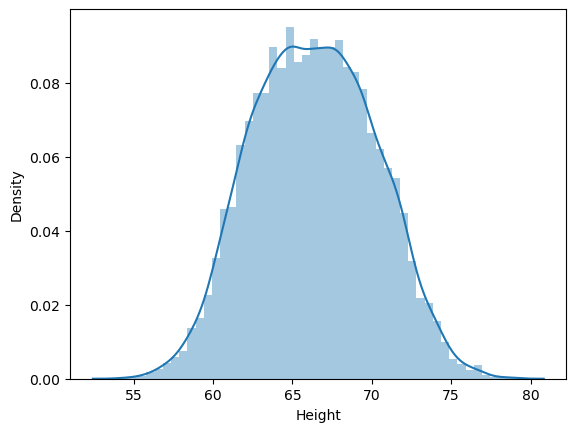

In [75]:
sns.distplot(df['Height'])

<Axes: >

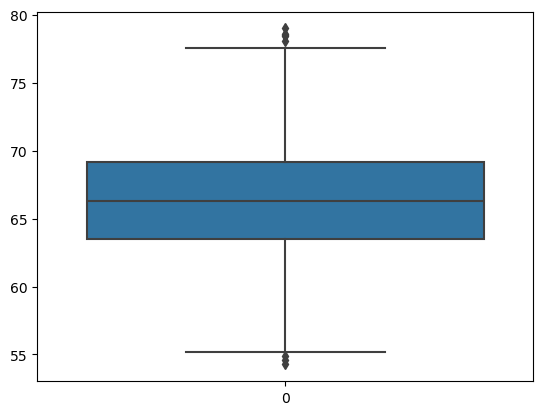

In [77]:
sns.boxplot(df['Height'])

In [78]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)
upper_limit,lower_limit

(74.7857900583366, 58.13441158671655)

TRIMMING

In [79]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [81]:
new_df.shape

(9799, 3)

CAPPING

In [82]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

<Axes: >

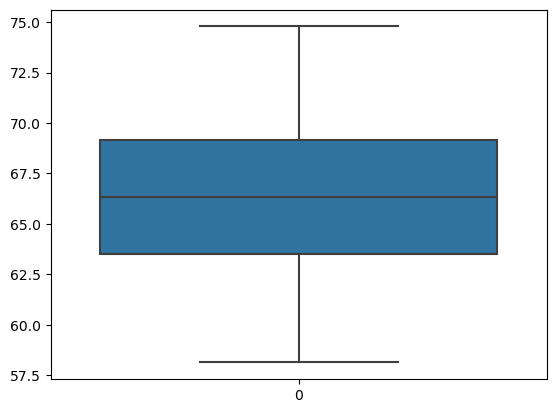

In [83]:
sns.boxplot(df['Height'])